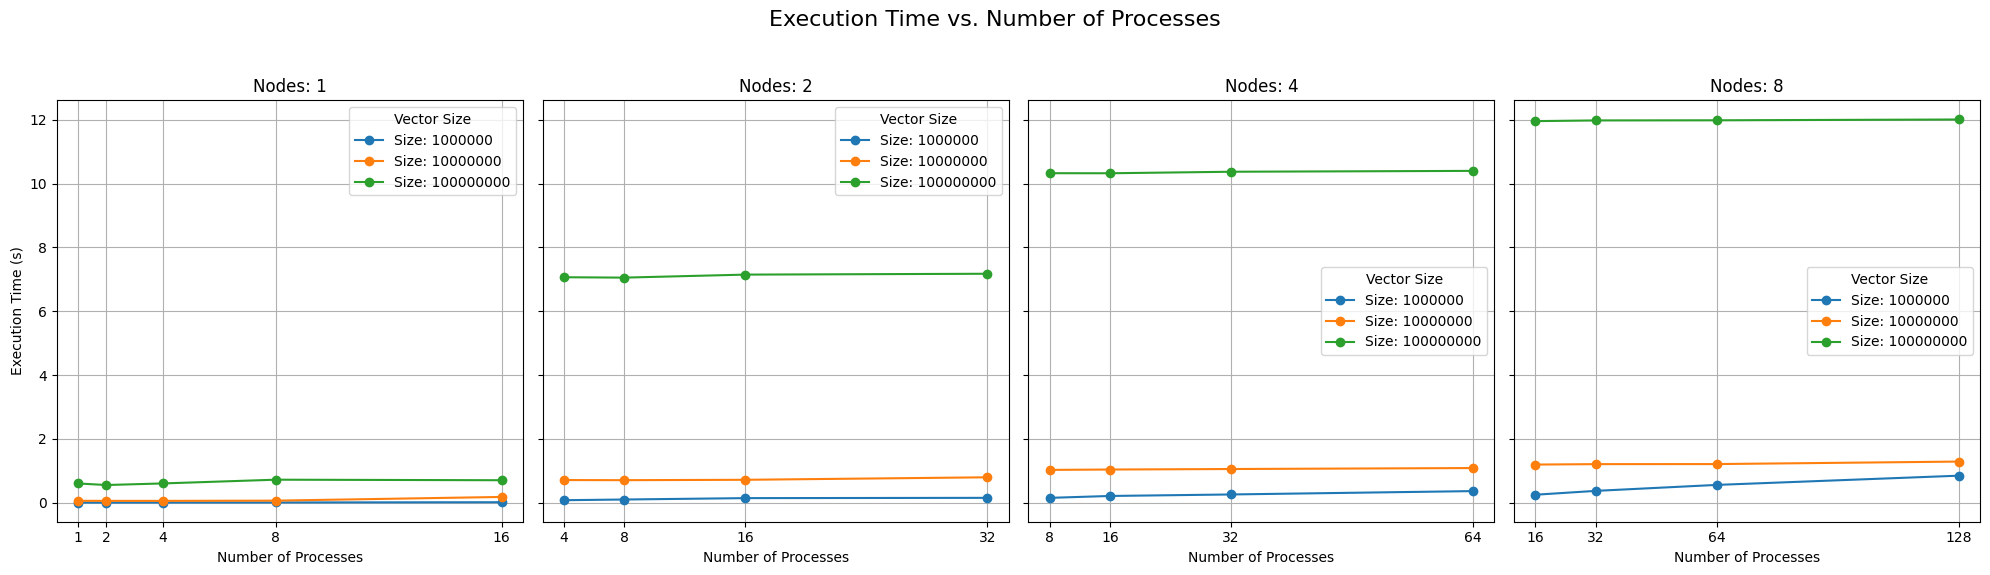

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '2_results.csv'
df = pd.read_csv(file_path)

base_times = df[(df['Nodes'] == 1) & (df['Processes'] == 1)].set_index('VectorSize')['Time_s'].to_dict()

unique_nodes = df['Nodes'].unique()
num_nodes = len(unique_nodes)

fig, axes = plt.subplots(1, num_nodes, figsize=(5 * num_nodes, 6), sharey=True)

if num_nodes == 1:
    axes = [axes]

for i, nodes in enumerate(unique_nodes):
    ax = axes[i]
    df_nodes = df[df['Nodes'] == nodes]
    
    for size in df_nodes['VectorSize'].unique():
        subset = df_nodes[df_nodes['VectorSize'] == size]
        subset = subset.sort_values(by='Processes')
        
        ax.plot(subset['Processes'], subset['Time_s'], marker='o', label=f'Size: {size}')

    ax.set_title(f'Nodes: {nodes}')
    ax.set_xlabel('Number of Processes')
    if i == 0:
        ax.set_ylabel('Execution Time (s)')
    ax.grid(True)
    ax.legend(title='Vector Size')

    ax.set_xticks(df_nodes['Processes'].unique())

fig.suptitle('Execution Time vs. Number of Processes', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

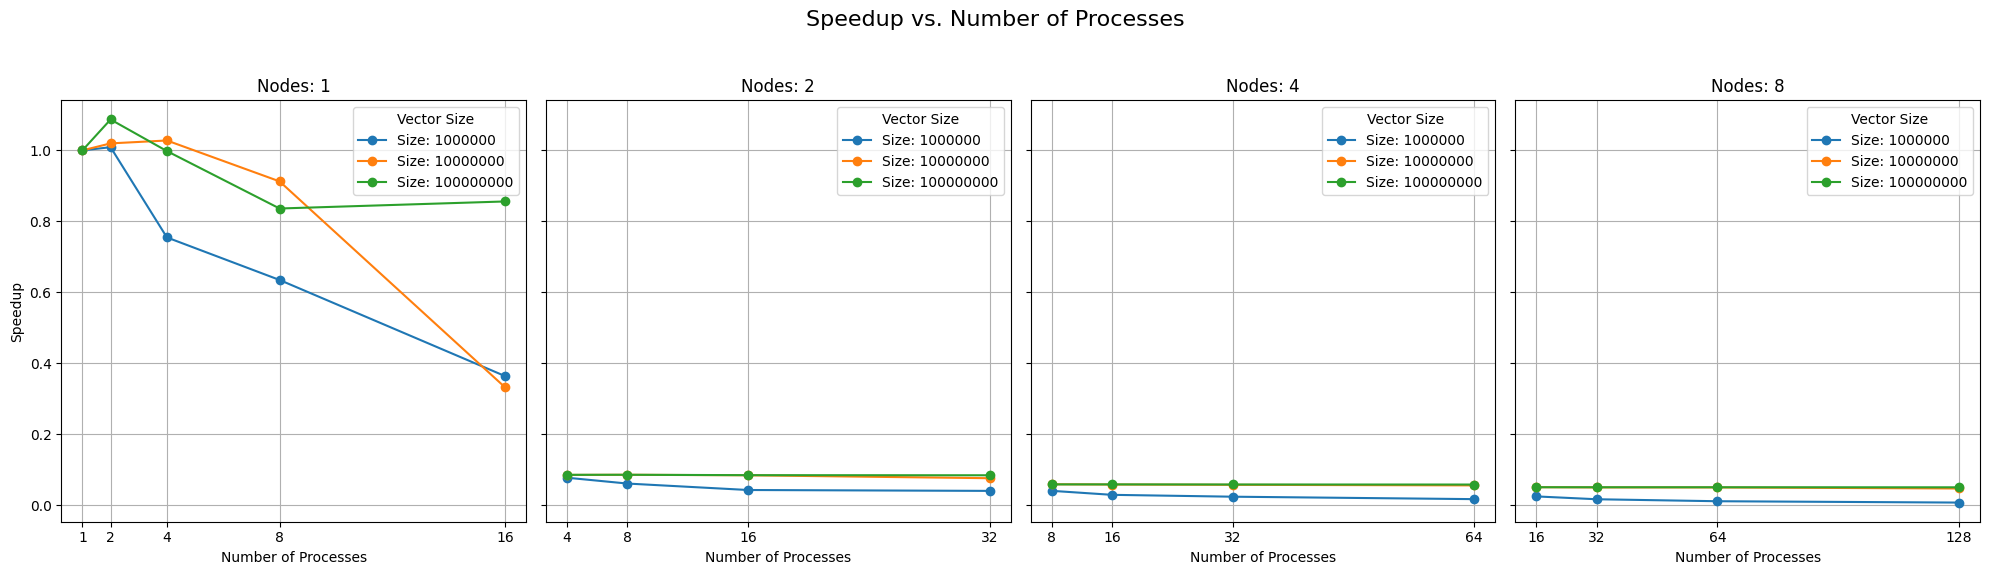

In [2]:
df['T_1'] = df['VectorSize'].map(base_times)
df['Speedup'] = df['T_1'] / df['Time_s']

fig, axes = plt.subplots(1, num_nodes, figsize=(5 * num_nodes, 6), sharey=True)

if num_nodes == 1:
    axes = [axes]

for i, nodes in enumerate(unique_nodes):
    ax = axes[i]
    df_nodes = df[df['Nodes'] == nodes]
    
    for size in df_nodes['VectorSize'].unique():
        subset = df_nodes[df_nodes['VectorSize'] == size]
        subset = subset.sort_values(by='Processes')
        
        ax.plot(subset['Processes'], subset['Speedup'], marker='o', label=f'Size: {size}')

    max_proc = df_nodes['Processes'].max()

    ax.set_title(f'Nodes: {nodes}')
    ax.set_xlabel('Number of Processes')
    if i == 0:
        ax.set_ylabel('Speedup')
    ax.grid(True)
    ax.legend(title='Vector Size')
    
    ax.set_xticks(df_nodes['Processes'].unique())

fig.suptitle('Speedup vs. Number of Processes', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

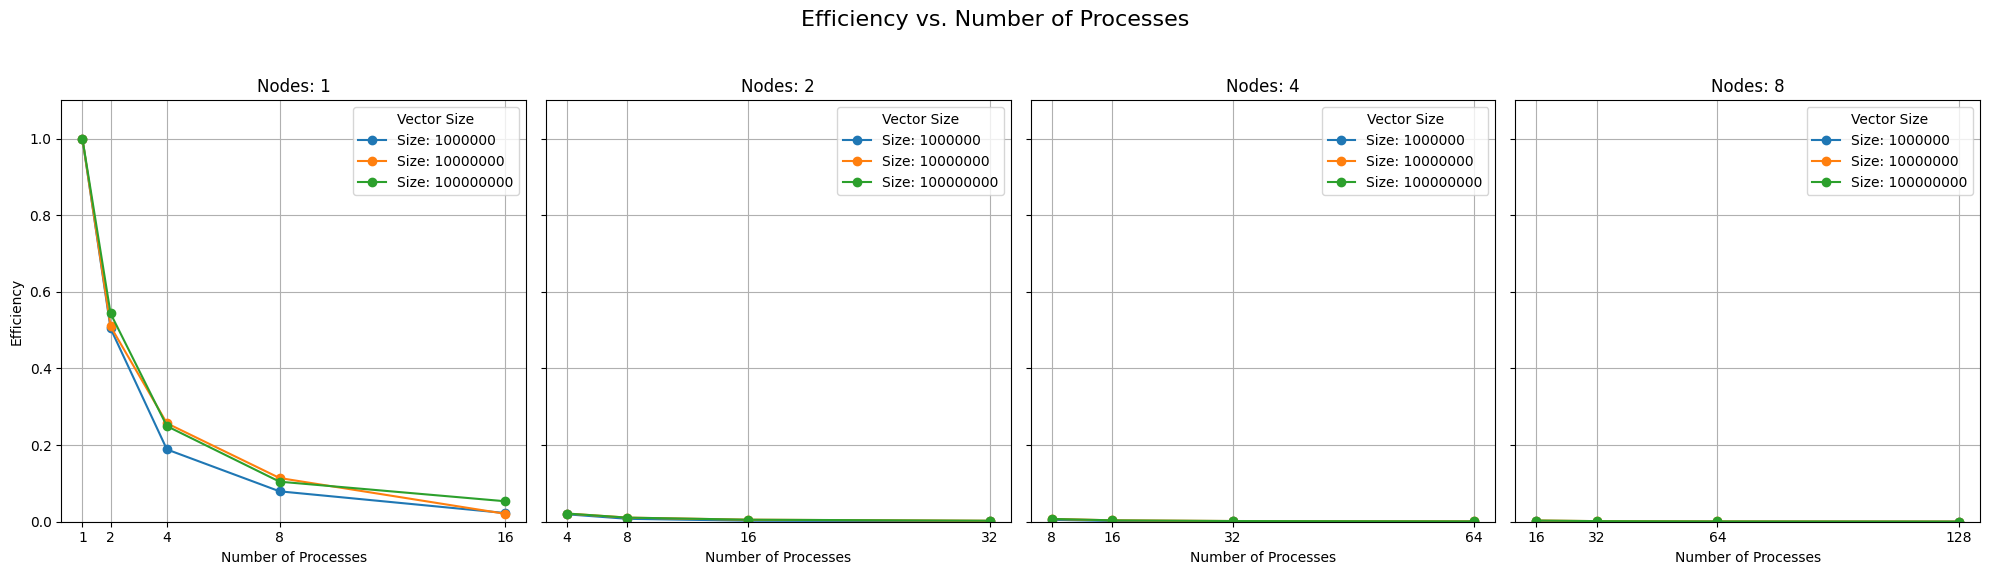

In [3]:
df['Efficiency'] = df['Speedup'] / df['Processes']

fig, axes = plt.subplots(1, num_nodes, figsize=(5 * num_nodes, 6), sharey=True)

if num_nodes == 1:
    axes = [axes]

for i, nodes in enumerate(unique_nodes):
    ax = axes[i]
    df_nodes = df[df['Nodes'] == nodes]
    
    for size in df_nodes['VectorSize'].unique():
        subset = df_nodes[df_nodes['VectorSize'] == size]
        subset = subset.sort_values(by='Processes')
        
        ax.plot(subset['Processes'], subset['Efficiency'], marker='o', label=f'Size: {size}')

    ax.set_title(f'Nodes: {nodes}')
    ax.set_xlabel('Number of Processes')
    if i == 0:
        ax.set_ylabel('Efficiency')
    ax.set_ylim(0, 1.1)
    ax.grid(True)
    ax.legend(title='Vector Size')
    
    ax.set_xticks(df_nodes['Processes'].unique())

fig.suptitle('Efficiency vs. Number of Processes', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()